# Softmax Regression Example

### 生成数据集
#### '<font color="blue">+</font>' 从高斯分布采样 (X, Y) ~ N(3, 6, 1, 1, 0).<br>
#### '<font color="green">o</font>' 从高斯分布采样  (X, Y) ~ N(6, 3, 1, 1, 0)<br>
#### '<font color="red">*</font>' 从高斯分布采样  (X, Y) ~ N(7, 7, 1, 1, 0)<br>

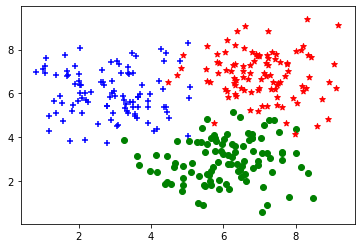

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from IPython.display import HTML
import numpy as np
%matplotlib inline

dot_num = 100
x_p = np.random.normal(3., 1, dot_num)
y_p = np.random.normal(6., 1, dot_num)
y = np.ones(dot_num)
C1 = np.array([x_p, y_p, y]).T

x_n = np.random.normal(6., 1, dot_num)
y_n = np.random.normal(3., 1, dot_num)
y = np.zeros(dot_num)
C2 = np.array([x_n, y_n, y]).T

x_b = np.random.normal(7., 1, dot_num)
y_b = np.random.normal(7., 1, dot_num)
y = np.ones(dot_num)*2
C3 = np.array([x_b, y_b, y]).T

plt.scatter(C1[:, 0], C1[:, 1], c='b', marker='+')
plt.scatter(C2[:, 0], C2[:, 1], c='g', marker='o')
plt.scatter(C3[:, 0], C3[:, 1], c='r', marker='*')

data_set = np.concatenate((C1, C2, C3), axis=0)
np.random.shuffle(data_set)

x, y = torch.from_numpy(data_set[:, :2]).float(), torch.from_numpy(data_set[:, 2]).long()

## 建立模型
建立模型类，定义loss函数，定义一步梯度下降过程函数

In [2]:
epsilon = 1e-12
class SoftmaxRegression(nn.Module):
    def __init__(self):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(2, 3)
        
    def forward(self, x):
        x = self.linear(x)
        return x


def compute_loss(pred, label):
    '''
    manual implementation of cross-entropy loss
    '''
    N = pred.size()[0]
    #################################################
    # TODO：手动实现softmax和cross-entropy          #
    #################################################
    
    pass

    #################################################
    return loss

criterion = nn.CrossEntropyLoss()

In [3]:
pred, tar = torch.randn(3, 5), torch.empty(3, dtype=torch.long).random_(0, 5)
raw = compute_loss(pred, tar)
cel = criterion(pred, tar)
print('difference:', cel.item()-raw.item())

model = SoftmaxRegression()
y_hat = model(x)
raw = compute_loss(y_hat, y)
cel = criterion(y_hat, y.view(-1))
print('difference:', cel.item()-raw.item())

difference: 0.0
difference: 9.5367431640625e-07


### 实例化一个模型，进行训练

In [4]:
import torch.optim as optim

model = SoftmaxRegression()
optimizer = optim.SGD(model.parameters(), lr=0.01)
N = x.size()[0]
for i in range(1000):
    optimizer.zero_grad()
    scores = model(x)
    loss = criterion(scores, y)
    loss.backward()
    optimizer.step()
    
    _, pred = torch.max(scores, dim=1)
    acc = (pred==y).sum().item()/N
    if i%50==49:
        print(f'loss: {loss.item():.4}\t accuracy: {acc:.4}')

loss: 0.9571	 accuracy: 0.5933
loss: 0.6945	 accuracy: 0.8067
loss: 0.5879	 accuracy: 0.89
loss: 0.5284	 accuracy: 0.8967
loss: 0.4889	 accuracy: 0.89
loss: 0.4602	 accuracy: 0.8967
loss: 0.438	 accuracy: 0.8967
loss: 0.4203	 accuracy: 0.9
loss: 0.4057	 accuracy: 0.9
loss: 0.3934	 accuracy: 0.9
loss: 0.3829	 accuracy: 0.9
loss: 0.3737	 accuracy: 0.9033
loss: 0.3657	 accuracy: 0.9033
loss: 0.3586	 accuracy: 0.9033
loss: 0.3523	 accuracy: 0.9033
loss: 0.3465	 accuracy: 0.9067
loss: 0.3413	 accuracy: 0.9067
loss: 0.3366	 accuracy: 0.9067
loss: 0.3322	 accuracy: 0.9067
loss: 0.3282	 accuracy: 0.9067


## 结果展示

(10000, 2)


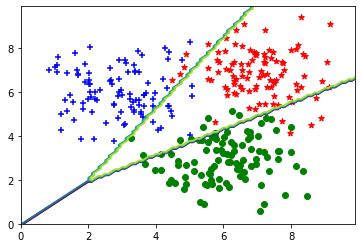

In [5]:
plt.scatter(C1[:, 0], C1[:, 1], c='b', marker='+')
plt.scatter(C2[:, 0], C2[:, 1], c='g', marker='o')
plt.scatter(C3[:, 0], C3[:, 1], c='r', marker='*')

x = np.arange(0., 10., 0.1)
y = np.arange(0., 10., 0.1)

X, Y = np.meshgrid(x, y)
inp = np.array(list(zip(X.reshape(-1), Y.reshape(-1))), dtype=np.float32)
print(inp.shape)
Z = model(torch.from_numpy(inp)).detach().numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(X.shape)
plt.contour(X,Y,Z)
plt.show()

## 答案
```python
# Softmax
colmax, _ = torch.max(pred, dim=1, keepdims=True)
prob = torch.exp(pred-colmax) # for numerical stability
prob = prob / torch.sum(prob, dim=1, keepdims=True)
    
# Cross-entropy loss
logprob = -torch.log(prob)
loss = torch.mean(logprob[range(N), label])
```